# Helping Newcomers Understand Projections in Machine Learning Using Julia Lang

In order to understand a large part of machine learning, you have to understand 'projections'. It does sound abstract because it can be used in different contexts, but in practice it is a very simple operation/calculation; the inner product between 2 vectors. You then may wonder why such abstract term like projections is used instead of the inner product (described soon), and the reason is that in different situations the inner product can be interpreted differently. The word projections and projection spaces does provide a good term to encapsulate what is happening in many situations. Here you will be taken through a few simple hand-crafted examples and hopefully it then becomes crystal clear.

First let us start with looking at the inner product. Even if you are familiar with this, it never hurts to refresh knowledge on them since they are a cornerstone to all of machine learning (ML).
Now imagine before getting into concrete examples that we have vectors and not scalar numbers. So that the numbers come in triplets, $v_1 = [2,5,1]$ as an example vector $v_1$. The vector has 3 numbers, and each number is independent of the others, meaning that eg, the first number can change to whatever value it wants and not be constrained by the other values, or the first and last can move without being constrained by the second value etc. Each number position in the vector is a 'dimension', and this vector is a 3 dimensional 'point'. It may seem strange to see 3 numbers, then the word 'dimension' and then the word 'point'. Since each number is independent of the others, it is considered its own dimension since the values move along on that point without restriction, that word helps clarify that. Then the collective of the values in the vector is a point because all the values along each dimension, are a specific configuration that if in 1 dimension, 2 dimensions or 3 dimensions can be drawn. Think of a vector with values for x,y,z, that is a spot in the 3d world we can point to. We can also make vectors for many things, for instance imagine that we look at houses as 5 dimensional vectors, and each time we see a house we collect 5 values, the area of land, the size of the house, the number of bathrooms, the number of bedrooms, and the price. With those 5 values we can make a vector, $v_{house} = [area, size, bathrooms, bedrooms, price]$. That vector is a 'point' in the 5 dimensional space of 'houses' as we chose to define it. We have to freedom to define it otherwise too, this is just an example. If we look at 100 houses, we would have 100 vectors of 5d. We could put all those vectors as rows in a matrix aligning the columns together, and even save it as a csv, and then even load it into excel. So your excel sheet of a table of data is a collection of vectors, each row a vector and a point in the space of the collection of columns, with each column a dimension. If we only considered 3 of the dimensions (columns of the spreadsheet), like the first 3 dimension the vectors would have, $v_{house} = [area, size, bathrooms]$ and being in 3d means we could product a 3d plot where each house is a 'point' not in 3d 'space' but in terms of the dimensions of (area,size,bathrooms) instead of distances (x,y,z). The distances for the point do not always have to be spatial distance, they can be other quantities we measure, but also values of a 'projection' (result of an inner product)

We can multiply these vectors together with a **dot product** (**inner product**). Here is an example:

$v_1 = [3,1], v_2 = [2,-2] \rightarrow v_1 . v_2 = (3) \times (2) + (1) \times (-2) = 6 + (-2) = 4$

All the inner product between 2 vectors does is, multiply the values of the corresponding dimensions and then add them together. It may appear too simple to be of much use but we can later see how it is insightful. Note that this inner product is positive ($v_1$ against $v_2$). Another example

$v_3 = [1,3], v_2 = [2,-2] \rightarrow v_3 . v_2 = (1) \times (2) + (3) \times (-2) = 2 + (-6) = -4$

Here the inner product between $v_3$ and $v_2$ is negative. Each one of these vectors is a point and their inner product result is a projection.
When we produce the inner product we get to see how each dimension aligns, and then get that sum. More examples:

- $v_4 = [-2,2], v_2 = [2,-2] \rightarrow v_4 . v_2 = (-2) \times (2) + (2) \times (-2) = -4 + (-4) = -8$
- $v_5 = [2,-2], v_2 = [2,-2] \rightarrow v_5 . v_2 = (2) \times (2) + (-2) \times (-2) = 4 + (4) = 8$
- $v_6 = [2,2], v_2 = [2,-2] \rightarrow v_5 . v_2 = (2) \times (2) + (2) \times (-2) = 4 + (-4) = 0$

We can see how $v_4$ is counter aligned to $v_2$ but $v_5$ is aligned. $v_6$ is not aligned at all. Without an example context the value of these inner products, these projections, are not very insightful but it helps see how the operations are conducted and the different situations. The key takeaway is that we can use the inner product to get the value of the projection of different vectors against $v_2$.

Now look at some data, collected from a hypothetical survey for people in different job positions:

| name           | walking | gym | emails | reading | relaxing |
|----------------|---------|-----|--------|---------|----------|
| Alan (HR)      | 1       | 2   | 2      | 1       | 0        |
| Bob (design)   | 0       | 0   | 2      | 3       | 1        |
| Craig (seo)    | 0       | 1   | 2      | 2       | 1        |
| Derek (manager)| 2       | 0   | 4      | 0       | 0        |
| Eric (sales)   | 3       | 3   | 0      | 0       | 0        |
| Fred (fitness) | 0       | 5   | 0      | 1       | 0        |
| Greg (accounts)| 0       | 0   | 5      | 1       | 0        |
| Henry (retired)| 0       | 0   | 0      | 1       | 5        |


In [2]:
using DataFrames

data = [
    ("Alan (HR)",       1, 2, 2, 1, 0),
    ("Bob (design)",    0, 0, 2, 3, 1),
    ("Craig (seo)",     0, 1, 2, 2, 1),
    ("Derek (manager)", 2, 0, 4, 0, 0),
    ("Eric (sales)",    3, 3, 0, 0, 0),
    ("Fred (fitness)",  0, 5, 0, 1, 0),
    ("Greg (accounts)", 0, 0, 5, 1, 0),
    ("Henry (retired)", 0, 0, 0, 1, 5),
]

col_names = [:name, :walking, :gym, :emails, :reading, :relaxing]

df = DataFrame(data, col_names)



Row,name,walking,gym,emails,reading,relaxing
,String,Int64,Int64,Int64,Int64,Int64
1,Alan (HR),1,2,2,1,0
2,Bob (design),0,0,2,3,1
3,Craig (seo),0,1,2,2,1
4,Derek (manager),2,0,4,0,0
5,Eric (sales),3,3,0,0,0
6,Fred (fitness),0,5,0,1,0
7,Greg (accounts),0,0,5,1,0
8,Henry (retired),0,0,0,1,5


Now we are going to select 'Fred' to be a reference vector, that other vectors (peoples' vectors) are going to project onto. That means multiplying each other vector onto Fred's and getting the value, including Fred. The inner product of Fred with Fred will be maximum.

In [3]:
fred_vec = Vector(df[6, 2:end]) #Fred's row vector

#get the inner products, the projections onto Fred
for i in 1:nrow(df)
    other_vec = Vector(df[i, 2:end])
    dot = sum(fred_vec .* other_vec) #<-- inner product computation
    println("(", df[i, :name], ", ", dot, ")")
end

(Alan (HR), 11)
(Bob (design), 3)
(Craig (seo), 7)
(Derek (manager), 0)
(Eric (sales), 15)
(Fred (fitness), 26)
(Greg (accounts), 1)
(Henry (retired), 1)


Let's do the same but using Greg's vector

In [4]:
greg_vec = Vector(df[7, 2:end]) #Greg's row vector

#get the inner products, the projections onto Greg
for i in 1:nrow(df)
    other_vec = Vector(df[i, 2:end])
    dot = sum(greg_vec .* other_vec) #<-- inner product computation
    println("(", df[i, :name], ", ", dot, ")")
end

(Alan (HR), 11)
(Bob (design), 13)
(Craig (seo), 12)
(Derek (manager), 20)
(Eric (sales), 0)
(Fred (fitness), 1)
(Greg (accounts), 26)
(Henry (retired), 1)


We can see that in both situations different values are produced and there may be a pattern but it is hard to see this holistically. Let's produce a scatter plot where each axis (dimension) is the result of the inner product between Fred or Greg. We are treating Fred and Greg as a set of basis vectors for the projections of vectors on them.

In [6]:
fred_vec = Vector(df[6, 2:end])
greg_vec = Vector(df[7, 2:end])

X_fred = Float64[] #projections onto Fred
Y_greg = Float64[] #projections onto Greg
labels = String[]

for i in 1:nrow(df)
    v = Vector(df[i, 2:end])
    push!(X_fred, sum(fred_vec .* v))#<-- inner product computation
    push!(Y_greg, sum(greg_vec .* v))#<-- inner product computation
    push!(labels, df[i, :name])
end

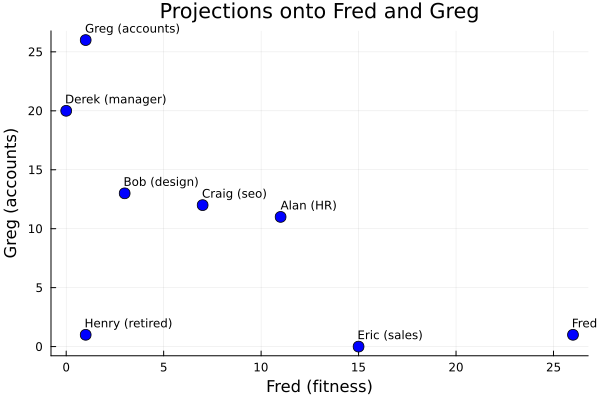

In [7]:
using Plots

p = scatter(X_fred, Y_greg, xlabel = "Fred (fitness)", ylabel = "Greg (accounts)", title = "Projections onto Fred and Greg",
    legend = false, markersize = 6, label = "", color = :blue, markerstrokecolor = :black)

for (x, y, label) in zip(X_fred, Y_greg, labels)
    annotate!(x, y+1, text(label, :left, 8))
end

savefig(p, "FredAndGreg.png")
display(p)

In [8]:
fred_vec = Vector(df[6, 2:end])
henry_vec = Vector(df[8, 2:end])

X_fred = Float64[] #projections onto Fred
Y_henry = Float64[] #projections onto Henry
labels = String[]

for i in 1:nrow(df)
    v = Vector(df[i, 2:end])
    push!(X_fred, sum(fred_vec .* v))#<-- inner product computation
    push!(Y_henry, sum(henry_vec .* v))#<-- inner product computation
    push!(labels, df[i, :name])
end


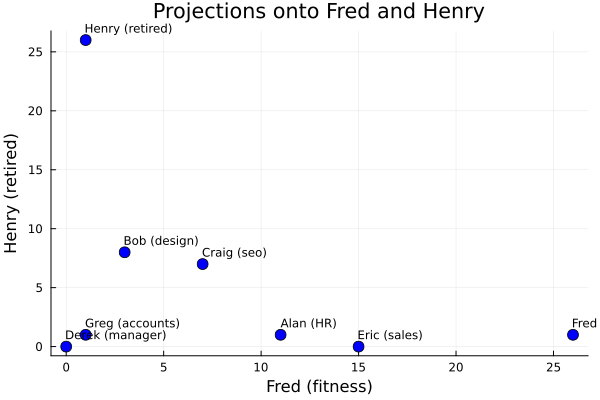

In [9]:
p = scatter(X_fred, Y_henry, xlabel = "Fred (fitness)", ylabel = "Henry (retired)", title = "Projections onto Fred and Henry",
    legend = false, markersize = 6, label = "", color = :blue, markerstrokecolor = :black)

for (x, y, label) in zip(X_fred, Y_henry, labels)
    annotate!(x, y+1, text(label, :left, 8))
end

savefig(p, "FredAndHenry.png")
display(p)

In [10]:
using Statistics
using LinearAlgebra

X = Matrix(df[:, 2:end])  # 8×5

#normalize vectors for Fred (6), Greg (7), Henry (8)
fred_vec  = normalize(Vector(df[6, 2:end]))
greg_vec  = normalize(Vector(df[7, 2:end]))
henry_vec = normalize(Vector(df[8, 2:end]))

#do the projections, inner products
proj_fred  = X * fred_vec
proj_greg  = X * greg_vec
proj_henry = X * henry_vec

#get the variances of these projections
var_fred  = var(proj_fred)
var_greg  = var(proj_greg)
var_henry = var(proj_henry)

println("Variance captured along Fred (fitness):  ", var_fred)
println("Variance captured along Greg (accounts): ", var_greg)
println("Variance captured along Henry (retired): ", var_henry)


Variance captured along Fred (fitness):  3.131868131868132
Variance captured along Greg (accounts): 3.461538461538462
Variance captured along Henry (retired): 3.0219780219780223


Variance captured along Fred (fitness):  3.131868131868132

Variance captured along Greg (accounts): 3.461538461538462

Variance captured along Henry (retired): 3.0219780219780223

with these values we can see why using Henry as a projection vector, basis, wasn't as good since the variance against that vector has less spread.

Here we chose prexisting rows to act as new dimensions on the scatter plot, so see the alignment of the others against it 'how much were they aligned with one or another person'. It is also possible to craft our own new vectors. 

We can just as easily invent axes that reflect specific hypotheses. Here are two hand‑crafted examples:

- relax_vec = [0,0,0,3,3]
- busy_vec = [0,3,3,0,0]

The relax_vec here puts emphasis on the relaxation and reading, and the busy_vec on emails and the gym. Walking is not part of either since so we can choose to exclude them. Setting its weight to 0—because we want these axes to focus on relaxation versus busyness. Now to see how the data projects and aligns with these crafted vectors.

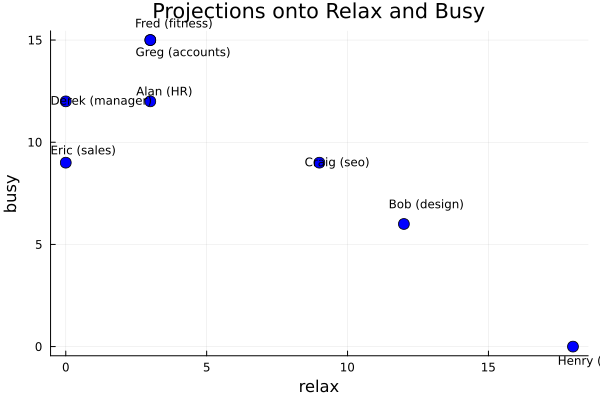

In [18]:
relax_vec = [0,0,0,3,3]
busy_vec = [0,3,3,0,0]

X_relax = Float64[] #projections onto relax
Y_busy = Float64[] #projections onto busy
labels = String[]

for i in 1:nrow(df)
    v = Vector(df[i, 2:end])
    push!(X_relax, sum(relax_vec .* v))#<-- inner product computation
    push!(Y_busy, sum(busy_vec .* v))#<-- inner product computation
    push!(labels, df[i, :name])
end

p = scatter(X_relax, Y_busy, xlabel = "relax", ylabel = "busy", 
            title = "Projections onto Relax and Busy",
            legend = false, markersize = 6, label = "", color = :blue, markerstrokecolor = :black)

for (x, y, label) in zip(X_relax, Y_busy, labels)
    annotate!(x-0.5, y-2(rand()-.5), text(label, :left, 8))
end

savefig(p, "RelaxBusy.png")
display(p)

It almost appears that there is a linear relationship for how relaxed or busy people are using these vectors, which can be useful. If you think about it, none of the data was removed in order to produce these 2 dimensional plots. The projections act as new dimensions of magnitudes of alignments. The dimensionality is reduced without reducing the data used.

Let us look at the variance from these 2 new vectors

In [19]:
#normalize vectors for Fred (6), Greg (7), Henry (8)
fred_vec  = normalize(Vector(df[6, 2:end]))
greg_vec  = normalize(Vector(df[7, 2:end]))
henry_vec = normalize(Vector(df[8, 2:end]))

relax_vec = normalize([0,0,0,3,3])
busy_vec = normalize([0,3,3,0,0])

#do the projections, inner products
proj_fred  = X * fred_vec
proj_greg  = X * greg_vec
proj_henry = X * henry_vec
proj_relax = X * relax_vec
proj_busy  = X * busy_vec

#get the variances of these projections
var_fred  = var(proj_fred)
var_greg  = var(proj_greg)
var_henry = var(proj_henry)
var_relax = var(proj_relax)
var_busy = var(proj_busy)

println("Variance captured along Fred (fitness):  ", var_fred)
println("Variance captured along Greg (accounts): ", var_greg)
println("Variance captured along Henry (retired): ", var_henry)
println("Variance captured along relax vector: ", var_relax)
println("Variance captured along busy vector: ", var_busy)

Variance captured along Fred (fitness):  3.131868131868132
Variance captured along Greg (accounts): 3.461538461538462
Variance captured along Henry (retired): 3.0219780219780223
Variance captured along relax vector: 2.285714285714286
Variance captured along busy vector: 1.3928571428571428


Although insightful vectors, the spread was not that great. There is a good intuition behind the vectors but the spread was small that does not help grouping the people into separate groups.

Later when we look at PCA (principal component analysis) we will see how there is a straightforward way to get vectors with good spread that separates the data.


**Inner product (dot product).**  
For two vectors \(\mathbf v,\,\mathbf u\in\mathbb R^{n}\) the inner product is the scalar  

$\mathbf v\cdot\mathbf u \;=\; \sum_{i=1}^{n} v_i\,u_i$

It measures **alignment**: positive → same half‑space, zero → orthogonal, negative → opposite half‑space.

---

**Projection of \(\mathbf v\) onto the direction of \(\mathbf u\).**  
The projection is **a new vector** that lies on the line spanned by \(\mathbf u\):

\[
\operatorname{proj}_{\mathbf u}(\mathbf v)
\;=\;
\frac{\mathbf v\cdot\mathbf u}{\lVert\mathbf u\rVert^{2}}\,
\mathbf u.
\]

* The *numerator* \(\mathbf v\cdot\mathbf u\) is the inner product you already know.  
* The *denominator* \(\lVert\mathbf u\rVert^{2}\) rescales so the result lands **on** the line, not “along” it.  
* If \(\mathbf u\) is a **unit** vector (\(\lVert\mathbf u\rVert=1\)), then  
  \[
    \operatorname{proj}_{\mathbf u}(\mathbf v)
    =(\mathbf v\cdot\mathbf u)\,\mathbf u,
  \]  
  and the inner product itself is exactly the **signed length** of the projection.

> **Rule of thumb:**  
> *Inner product* → “How much do they align?” (scalar)  
> *Projection* → “Give me the part of \(\mathbf v\) that lies in the direction \(\mathbf u\)” (vector)

---

#### Quick Julia check 🧑‍💻
```julia
using LinearAlgebra

v = [3, 4]
u = [1, 2]

scalar      = dot(v, u)                   # inner product
proj_vector = (scalar / dot(u, u)) * u    # projection of v onto u



 If we have 2 numbers in variables, x and y, they are scalars but also simply 1-dimensional vectors. They can represent quantities, the same quantity in each or different ones. With just this, it may appear as nothing interesting can be found, from the operations on them. When they represent the same group we can add and subtract, and multiply, ok. When we multiply them, xy, it is just the multiplication of the 2 numbers but, if we look their sign we can also tell if they 'align'. Here the 'alignment' is, if x and y are both positive, then x times y is positive (aligned), if x and y are both negative the multiplication (product of both numbers) is also aligned. On the contrary when either x or y do not share the same sign, position around zero, their product is negative, counter aligned. I will use the '.' (dot) to be a multiplication between vectors or numbers:

- x.y > 0 : aligned about value zero
- x.y < 0 : counter aligned about value zero
- x.y = 0 : no alignment

Sometimes we don't have to look at value zero as the center. Imagine the center for x is 10 and for y it is still 0. Then if x = 5 and y = -5, so the new product is (x-10).(y) = (-5).(y) = (-5).(-5) = 25 > 0 being positively aligned.

When we have a collection of these pairs of x and y we can use the covariance formula, $cov(X,Y) = \frac{1}{N} \sum^N_{i=1} (x_i - \bar{x})(y_i - \bar{y})$, these are alignments not around value zero but their averages (which could be zero or not). From this formula, if we ignore the fraction of 1/n, the driving force is actually a sum of the alignments across the pairs $(x_i - \bar{x})(y_i - \bar{y})$. Each pair produces a positive or negative contribution to the total sum and the fraction at the start give an average value for the magnitude of this alignment across all pairs. If we say looking at $i=1$, $(x_1 - \bar{x})(y_1 - \bar{y})$ is just the alignment of those 2 scalars, but not around the value zero, around its mean. What does a positive alignment tell us? That if one point is above its mean, the other point will also be above its mean as well to produce a positive product, as well as the counter case if one variable is below its average then so it is expected that the other will be below its average too. If the alignment is negative, the sum of these pair products is negative then when you look at one variable and it is 'above' its average you can expect the other variable to be 'below' and vice versa. The covariance therefore provides a way for us to know the general alignment, the information about one variable's postion about their mean and how the other variable is expected to be. So:

- cov(X,Y) > 0 : when one variable is above its mean, we expect the other to also be above it own mean, and vice versa
- cov(X,Y) < 0 : when one variable is above its mean, we expect the other to be below its own mean, and vice versa
- cov(X,Y) = 0 : no alignment

Now in cov(X,Y) the zero can be misleading by thinking that each multiplication was zero, actually it often is the case that it is due to an equal number of positives and negatives that 'cancel' each other out so there is no consistent alignment direction. Up to hear the word alignment was used cause it helps when discussing vectors. 